# 🚀<span style="color:brown">About Dataset</span>

**Age** : Age of the patient

**Sex** : Sex of the patient

**exang**: exercise induced angina (1 = yes; 0 = no)

**ca**: number of major vessels (0-3)

**cp** : Chest Pain type chest pain type

**Value 1**: typical angina

**Value 2**: atypical angina

**Value 3**: non-anginal pain

**Value 4**: asymptomatic

**trtbps** : resting blood pressure (in mm Hg)

**chol** : cholestoral in mg/dl fetched via BMI sensor

**fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg** : resting electrocardiographic results

**Value 0**: normal

**Value 1**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**Value 2**: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach** : maximum heart rate achieved

**target** : 0= less chance of heart attack 1= more chance of heart attack

---

# 📌 <span style="color:brown">Questions about the dataset</span>

**Analysis-1**: What is the maximum age count of the heart patients? What is the % of male and female patients?

**Analysis-2**: What is the maximum blood pressure, cholesterol and heart rate count of the patients?

**Analysis-3**: Does blood pressure, maximum heart rate and cholesterol vary with increase in the age of the patients?

**Analysis-4**: Does cholesterol incerases the chance of causing heart attack?

**Analysis-5**: Does max heart rate & blood pressure incerases the chance of causing heart attack?

**Analysis-6**: When patients suffers from chest pain, is it due to high pulse rate?

**Analysis-7**: Does blood pressure,max pulse rate & cholesterol vary with the gender?

---

# 📚 <span style="color:brown">Importing libraries and dataset</span>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df= pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---
# 📚 <span style="color:brown">Data wrangling</span>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
train_df=df['sex'].replace([0,1],['Female','Male'], inplace=False)
train_df

0        Male
1        Male
2      Female
3        Male
4      Female
        ...  
298    Female
299      Male
300      Male
301      Male
302    Female
Name: sex, Length: 303, dtype: object

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(keep='first')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


---
# 📊 <span style="color:brown">Checking the outlier</span>

In [8]:
q1= df.quantile(0.25)
q3= df.quantile(0.75)
IQR= q3-q1
upper_outlier= q3+IQR*1.5
lower_outlier= q1-IQR*1.5

upper_dict=dict(upper_outlier)
lower_dict= dict(lower_outlier)

In [9]:
for a,b in df.items():
    b_col = b[( b<= lower_dict[a]) | (b >= upper_dict[a])]
    perc = np.shape(b_col)[0] * 100.0 / np.shape(df)[0]
    print("Column {} outliers = {} => {}%".format(a,len(b_col),round((perc),2)))

Column age outliers = 0 => 0.0%
Column sex outliers = 0 => 0.0%
Column cp outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.29%
Column chol outliers = 5 => 1.65%
Column fbs outliers = 303 => 100.0%
Column restecg outliers = 0 => 0.0%
Column thalachh outliers = 1 => 0.33%
Column exng outliers = 0 => 0.0%
Column oldpeak outliers = 8 => 2.64%
Column slp outliers = 0 => 0.0%
Column caa outliers = 25 => 8.25%
Column thall outliers = 2 => 0.66%
Column output outliers = 0 => 0.0%


# 📊 <span style="color:brown">Transformation of outliers</span>

In [10]:
df["fbs"]= np.log(df.age)
df["trtbps"]= np.log(df.trtbps)
df["chol"]= np.log(df.chol)
df["thalachh"]= np.log(df.thalachh)
print("---Log Transform of outliers performed---")

---Log Transform of outliers performed---


----
# 📊 <span style="color:brown">Exploratory Data Analysis</span>

## 💡<span style="color:green">Analysis-1</span>

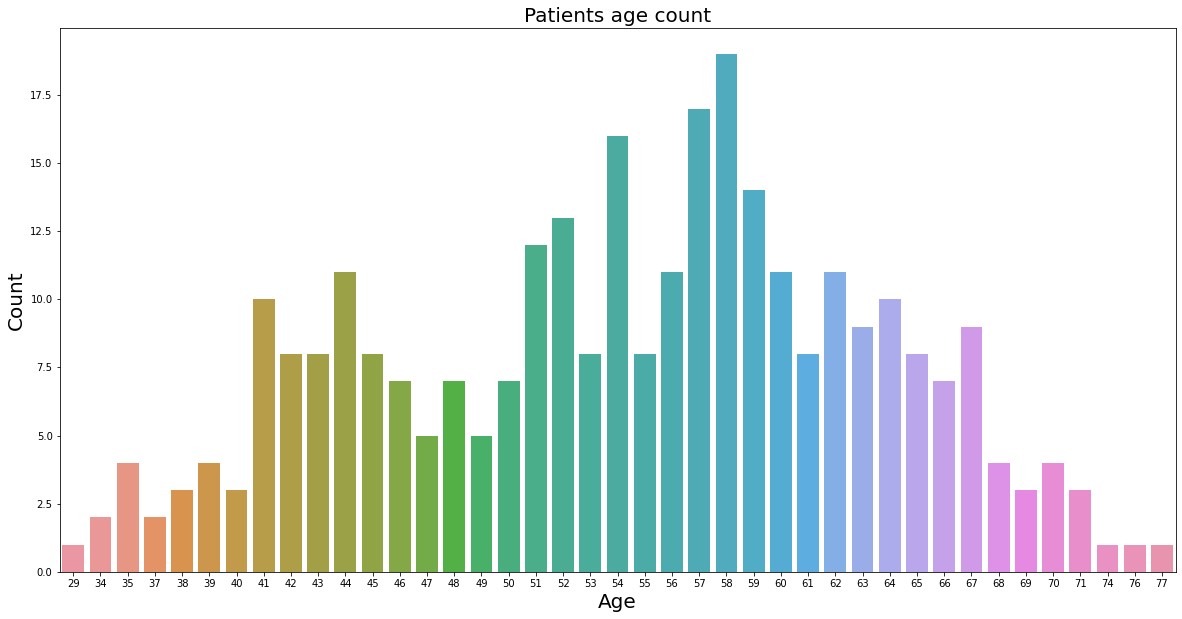

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["age"])
plt.title('Patients age count',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [12]:
s=df["sex"].value_counts().reset_index()
px.pie(s,names="index",values="sex",title='percentage of male & female patients')

**Observation**:
- Maximum age count of the heart patients is 58 
- Percentage of male patients is 68.3% and female patients is 31.7%

---
## 💡<span style="color:green">Analysis-2</span>

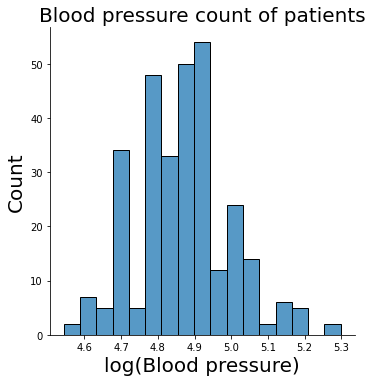

In [13]:
sns.displot(df["trtbps"])
plt.title('Blood pressure count of patients',fontsize=20)
plt.xlabel('log(Blood pressure)',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

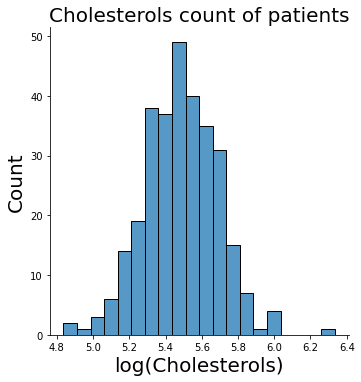

In [14]:
sns.displot(df['chol'])
plt.title('Cholesterols count of patients',fontsize=20)
plt.xlabel('log(Cholesterols)',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

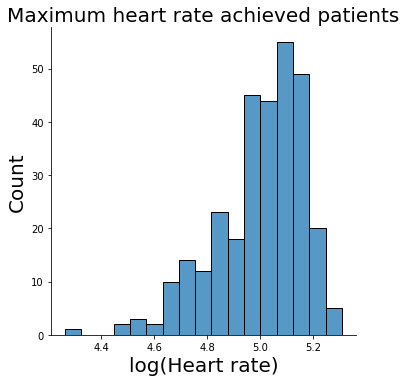

In [15]:
sns.displot(df['thalachh'])
plt.title('Maximum heart rate achieved patients',fontsize=20)
plt.xlabel('log(Heart rate)',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

**Observation**: In these graphs all the factors are transformed to **logarithm form**,
- The highest count of maximum heart rate is betwwen 5.0 and 5.2
- The highest count of high cholesterol is between 5.4 and 5.6
- The highest count of high blood pressure is between 4.9 and 5.0

## 💡<span style="color:green">Analysis-3</span>

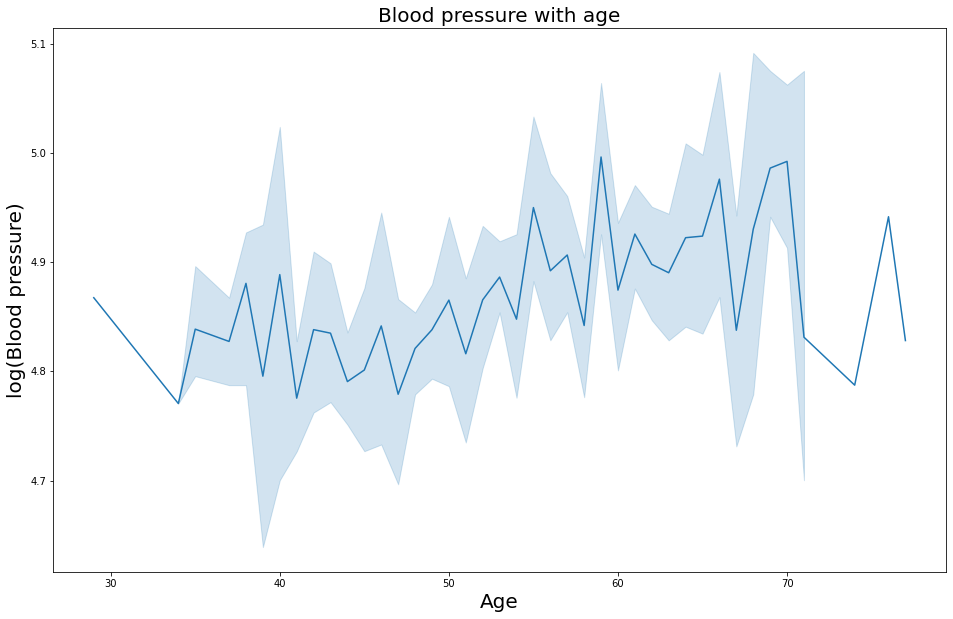

In [16]:
plt.figure(figsize=(16,10))
sns.lineplot(y="trtbps",x="age",data=df)
plt.title('Blood pressure with age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(Blood pressure)',fontsize=20)
plt.show()

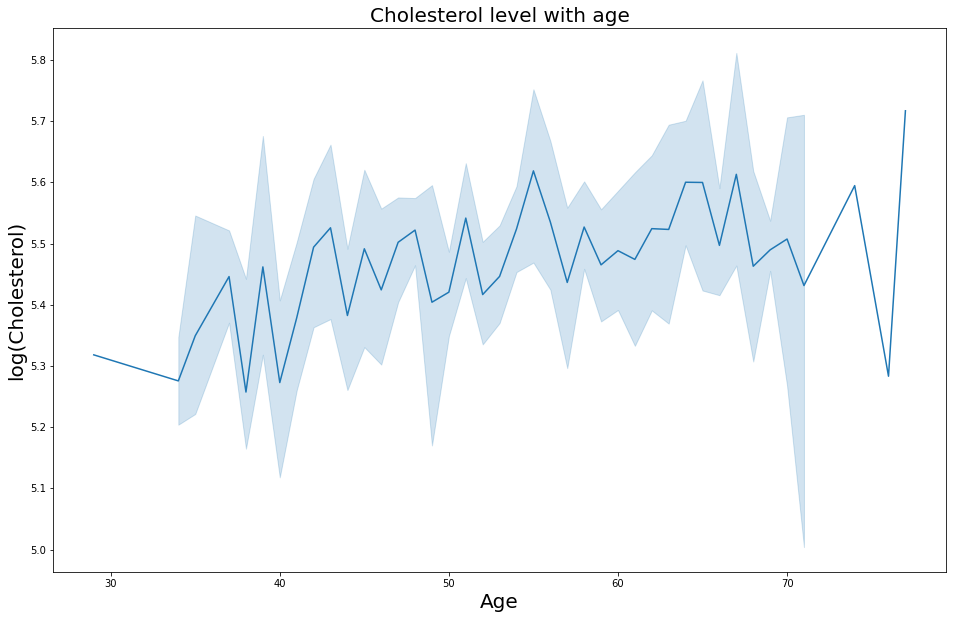

In [17]:
plt.figure(figsize=(16,10))
sns.lineplot(y='chol',x="age",data=df)
plt.title('Cholesterol level with age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(Cholesterol)',fontsize=20)
plt.show()

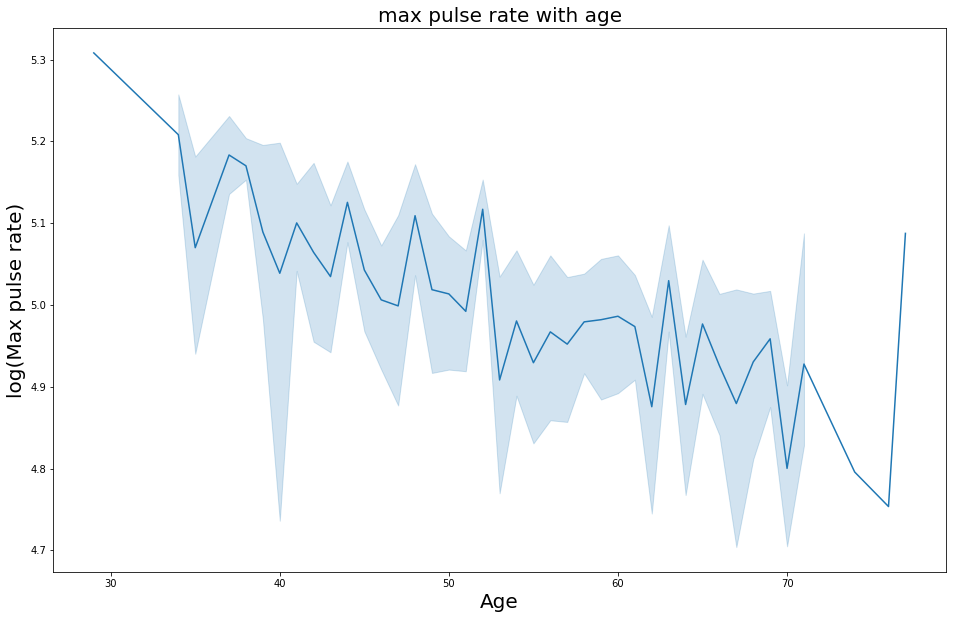

In [18]:
plt.figure(figsize=(16,10))
sns.lineplot(y='thalachh',x="age",data=df)
plt.title('max pulse rate with age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(Max pulse rate)',fontsize=20)
plt.show()

**Observation**: Maximum pulse rate, high cholesterol and blood pressure does vary with the increase in age of the patients. 

## 💡<span style="color:green">Analysis-4</span>

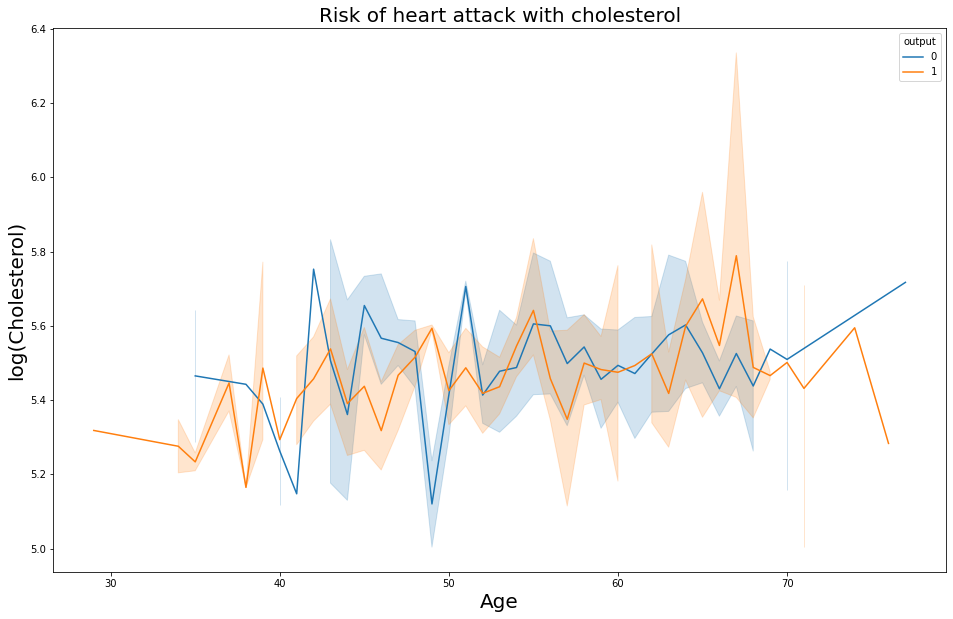

In [19]:
plt.figure(figsize=(16,10))
sns.lineplot(y='chol',x="age",hue='output',data=df)
plt.title('Risk of heart attack with cholesterol',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(Cholesterol)',fontsize=20)
plt.show()

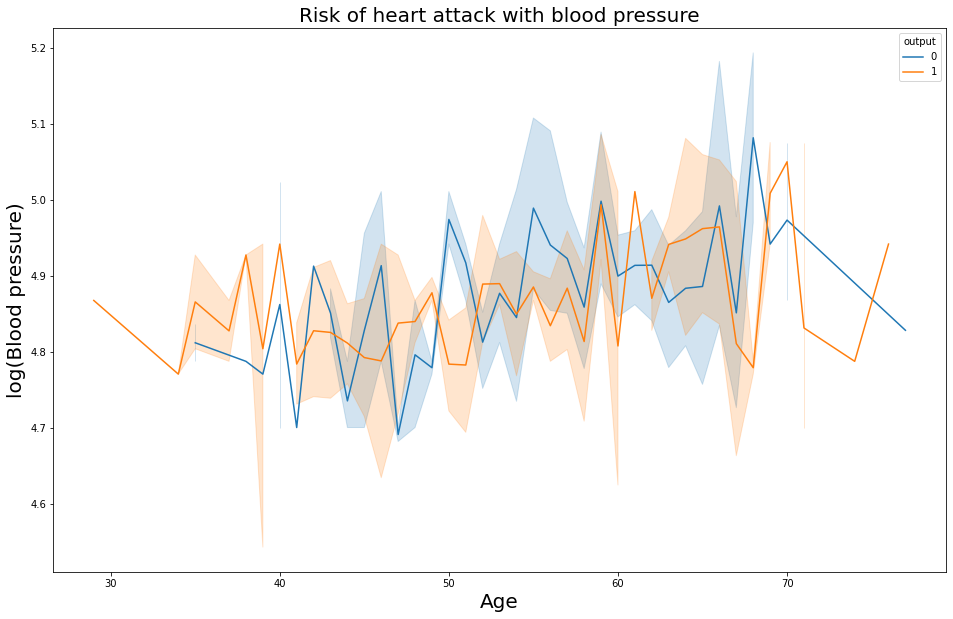

In [20]:
plt.figure(figsize=(16,10))
sns.lineplot(y='trtbps',x="age",hue='output',data=df)
plt.title('Risk of heart attack with blood pressure',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(Blood pressure)',fontsize=20)
plt.show()

**Observation**: High Blood pressure and high cholesterol does not relate to the cause of heart attack.

# 💡<span style="color:green">Analysis-5</span>

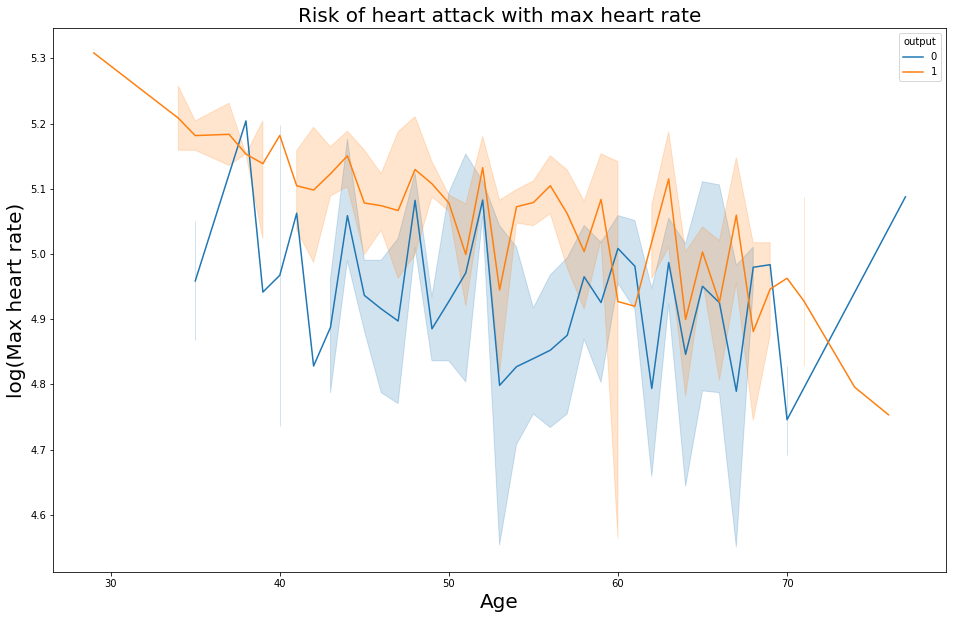

In [21]:
plt.figure(figsize=(16,10))
sns.lineplot(y='thalachh',x="age",hue='output',data=df)
plt.title('Risk of heart attack with max heart rate',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(Max heart rate)',fontsize=20)
plt.show()

**Observation**: Maximum heart rate does increases the risk of heart attack.

## 💡<span style="color:green">Analysis-6</span>

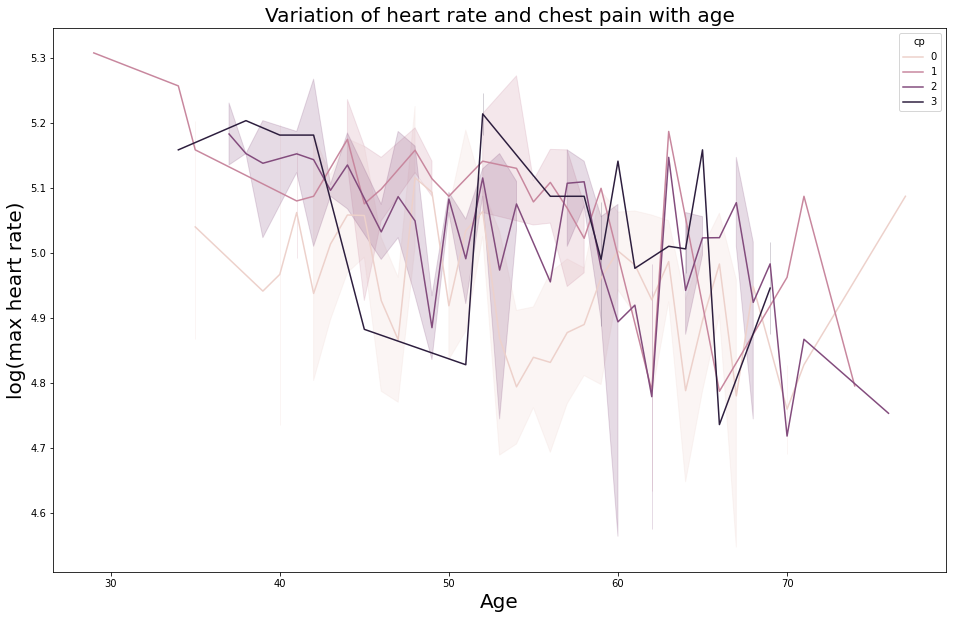

In [22]:
plt.figure(figsize=(16,10))
sns.lineplot(y='thalachh',x="age",hue='cp',data=df)
plt.title('Variation of heart rate and chest pain with age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(max heart rate)',fontsize=20)
plt.show()

**Observation**: When the person suffers from extreme chest pain is due to maximum heart rate.

## 💡<span style="color:green">Analysis-7</span>

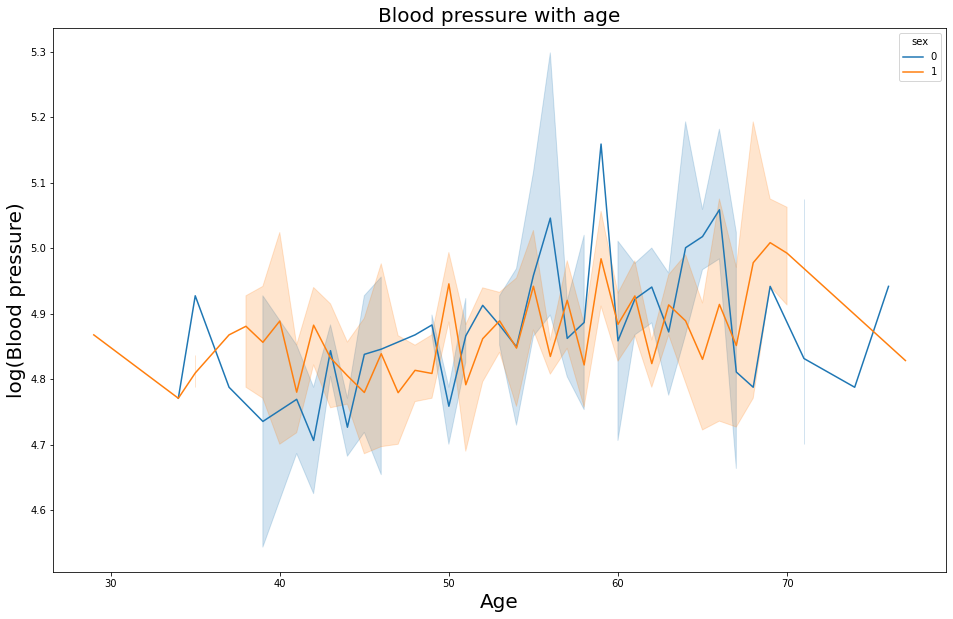

In [23]:
plt.figure(figsize=(16,10))
sns.lineplot(y='trtbps',x="age",hue='sex',data=df)
plt.title('Blood pressure with age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(Blood pressure)',fontsize=20)
plt.show()

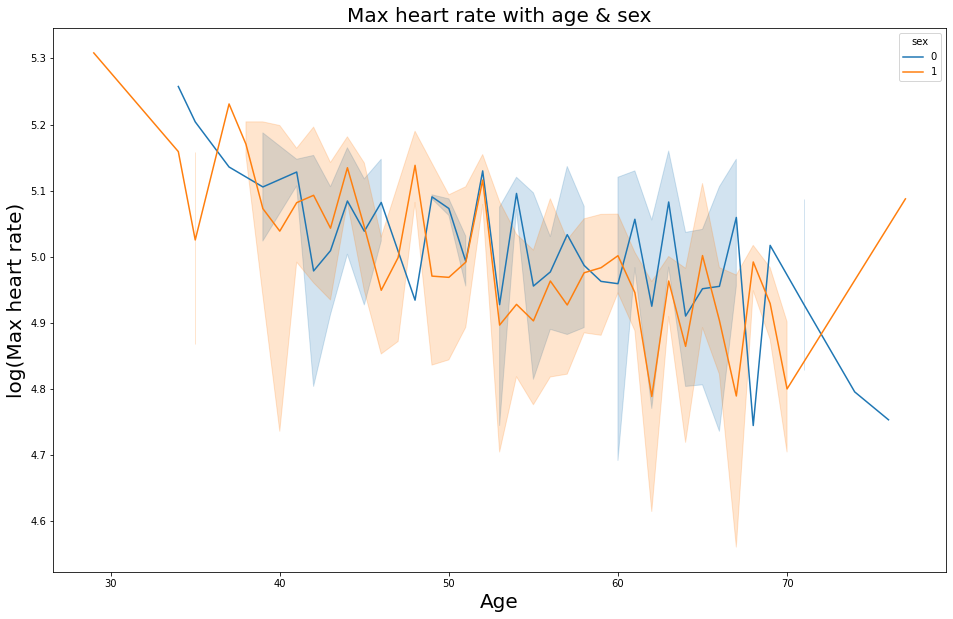

In [24]:
plt.figure(figsize=(16,10))
sns.lineplot(y='thalachh',x="age",hue='sex',data=df)
plt.title('Max heart rate with age & sex',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(Max heart rate)',fontsize=20)
plt.show()

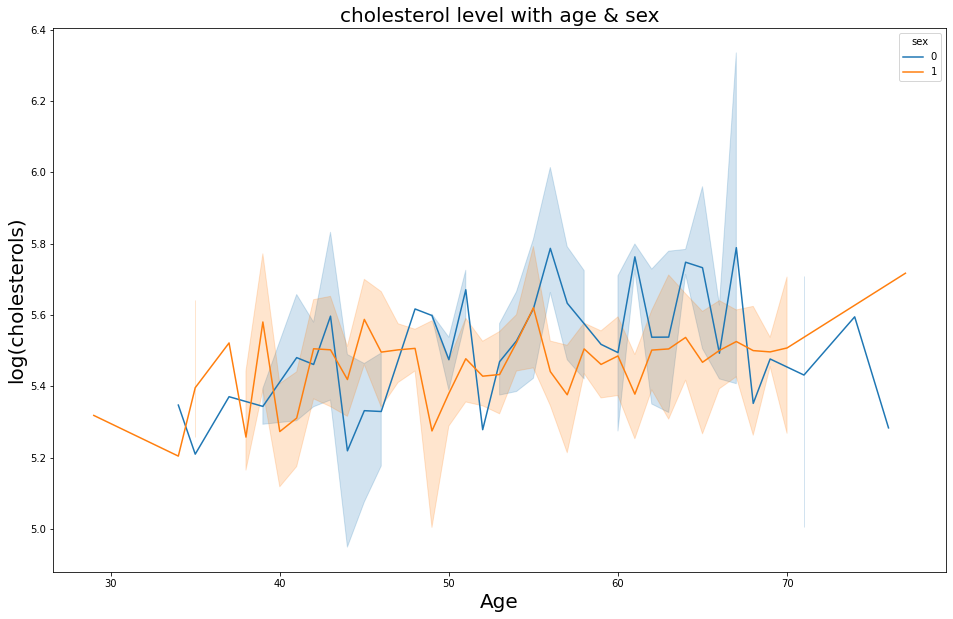

In [25]:
plt.figure(figsize=(16,10))
sns.lineplot(y='chol',x="age",hue='sex',data=df)
plt.title('cholesterol level with age & sex',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('log(cholesterols)',fontsize=20)
plt.show()

**Observation**: cholesterol,heart rate & blood pressure doesn't depend on the gender.

# 📊 <span style="color:brown">Basics of Machine learning</span>

In [26]:
# droping the column 'drop' as it's unecessary for the predictions
X= df.drop('output', axis=1)
y= df['output']

In [27]:
#importing sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [28]:
#Fitting & transforming the data
scaler=StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X))

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.79      0.88      0.83        34

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [31]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,4.976734,5.451038,4.143135,0,5.010635,0,2.3,0,0,1,1
1,37,1,2,4.867534,5.521461,3.610918,1,5.231109,0,3.5,0,0,2,1
2,41,0,1,4.867534,5.318120,3.713572,0,5.147494,0,1.4,2,0,2,1
3,56,1,1,4.787492,5.463832,4.025352,1,5.181784,0,0.8,2,0,2,1
4,57,0,0,4.787492,5.869297,4.043051,1,5.093750,1,0.6,2,0,2,1


In [32]:
#checking the accuracy of the model
model= RandomForestClassifier()
model.fit(X_train,y_train)
predict_df=model.predict(X_test)
metrics.accuracy_score(y_test,predict_df)

0.8852459016393442

In [33]:
#doing the cross validation of the training data
reg = LogisticRegression()
k = 5
cv_result = cross_val_score(reg,X,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.81967213 0.86885246 0.80327869 0.86666667 0.75      ]
CV scores average:  0.8216939890710382
